In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
index_master = pd.read_csv("dataset/index_master.csv")

In [3]:
tracks={}
for no in ['A','B','C','D']:
    tracks[no] = pd.read_csv("dataset/track_" + no + ".csv", parse_dates=["date"])

In [4]:
equipments={}
for no in ['A','B','C','D']:
    equipments[no] = pd.read_csv("dataset/equipment_" + no + ".csv")

In [5]:
tracks["A"].head()

,date,キロ程,高低左,高低右,通り左,通り右,水準,軌間,速度
0,2017-04-01,10000,-1.16,-0.23,1.20,1.20,0.83,3.89,84.0
1,2017-04-01,10001,-1.17,-0.30,1.88,1.88,0.67,4.63,84.0
2,2017-04-01,10002,-1.09,-0.19,2.30,2.30,0.50,5.33,84.0
3,2017-04-01,10003,-0.64,0.20,2.28,2.28,0.46,5.90,84.0
4,2017-04-01,10004,0.47,0.89,1.74,1.74,0.62,6.38,84.5


In [6]:
equipments["A"].head()

,キロ程,バラスト,ロングレール,マクラギ種別,橋りょう,踏切,通トン,曲線半径,フラグ
0,10000,1,1,3,0,0,13.607,0,1
1,10001,1,1,3,0,0,13.607,0,1
2,10002,1,1,3,0,0,13.607,0,1
3,10003,1,1,3,0,0,13.607,0,1
4,10004,1,1,1,0,0,13.607,0,1


In [7]:
tracks["A"].corr()

,キロ程,高低左,高低右,通り左,通り右,水準,軌間,速度
キロ程,1.000000,0.001649,0.001692,0.001418,0.005611,-0.001766,0.011020,-0.025942
高低左,0.001649,1.000000,0.859896,-0.024764,0.000893,0.127706,-0.008493,-0.001637
高低右,0.001692,0.859896,1.000000,-0.013748,0.007806,-0.230668,-0.007818,-0.002890
通り左,0.001418,-0.024764,-0.013748,1.000000,0.672010,0.110360,0.239638,-0.005872
通り右,0.005611,0.000893,0.007806,0.672010,1.000000,0.114152,-0.186453,-0.003561
水準,-0.001766,0.127706,-0.230668,0.110360,0.114152,1.000000,0.004297,0.004581
軌間,0.011020,-0.008493,-0.007818,0.239638,-0.186453,0.004297,1.000000,0.000767
速度,-0.025942,-0.001637,-0.002890,-0.005872,-0.003561,0.004581,0.000767,1.000000


In [8]:
equipments["A"].corr()

,キロ程,バラスト,ロングレール,マクラギ種別,橋りょう,踏切,通トン,曲線半径,フラグ
キロ程,1.000000,0.735576,-0.009231,0.049370,0.043236,0.086872,-0.254078,-0.060245,-0.143922
バラスト,0.735576,1.000000,-0.082503,-0.134649,-0.170557,-0.049865,-0.122773,-0.076995,-0.020903
ロングレール,-0.009231,-0.082503,1.000000,-0.491214,-0.372674,0.011427,-0.046478,0.047615,-0.305350
マクラギ種別,0.049370,-0.134649,-0.491214,1.000000,0.668407,0.428016,-0.002388,-0.042737,0.127005
橋りょう,0.043236,-0.170557,-0.372674,0.668407,1.000000,-0.011865,0.027053,-0.035931,-0.074134
踏切,0.086872,-0.049865,0.011427,0.428016,-0.011865,1.000000,-0.037583,-0.001028,-0.022551
通トン,-0.254078,-0.122773,-0.046478,-0.002388,0.027053,-0.037583,1.000000,-0.172894,-0.071135
曲線半径,-0.060245,-0.076995,0.047615,-0.042737,-0.035931,-0.001028,-0.172894,1.000000,-0.067637
フラグ,-0.143922,-0.020903,-0.305350,0.127005,-0.074134,-0.022551,-0.071135,-0.067637,1.000000


In [9]:
# 軌道検測データと設備台帳データを統合
dfs={}
for no in ['A','B','C','D']:
    dfs[no] = pd.merge(tracks[no], equipments[no], on="キロ程")

In [34]:
dfs["A"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10185690 entries, 0 to 10185689
Data columns (total 17 columns):
date      datetime64[ns]
キロ程       int64
高低左       float64
高低右       float64
通り左       float64
通り右       float64
水準        float64
軌間        float64
速度        float64
バラスト      int64
ロングレール    int64
マクラギ種別    int64
橋りょう      int64
踏切        int64
通トン       float64
曲線半径      int64
フラグ       int64
dtypes: datetime64[ns](1), float64(8), int64(8)
memory usage: 1.4 GB


In [11]:
dfs["A"].corr()

,キロ程,高低左,高低右,通り左,通り右,水準,軌間,速度,バラスト,ロングレール,マクラギ種別,橋りょう,踏切,通トン,曲線半径,フラグ
キロ程,1.000000,0.001649,0.001692,0.001418,0.005611,-0.001766,0.011020,-0.025942,0.735576,-0.009231,0.049370,0.043236,0.086872,-0.254078,-0.060245,-0.143922
高低左,0.001649,1.000000,0.859896,-0.024764,0.000893,0.127706,-0.008493,-0.001637,-0.008000,-0.000902,0.030091,0.010774,0.052875,-0.001462,0.001755,0.001213
高低右,0.001692,0.859896,1.000000,-0.013748,0.007806,-0.230668,-0.007818,-0.002890,-0.006943,-0.002824,0.024694,0.005863,0.046328,-0.001442,0.001348,0.001836
通り左,0.001418,-0.024764,-0.013748,1.000000,0.672010,0.110360,0.239638,-0.005872,0.007872,-0.016481,-0.019129,-0.007434,-0.006480,0.000323,-0.000464,-0.000009
通り右,0.005611,0.000893,0.007806,0.672010,1.000000,0.114152,-0.186453,-0.003561,0.009477,-0.000089,-0.032530,-0.005662,-0.014081,-0.002830,0.001530,-0.013118
水準,-0.001766,0.127706,-0.230668,0.110360,0.114152,1.000000,0.004297,0.004581,-0.007844,0.011366,0.021360,0.013784,0.034417,0.001035,0.003775,-0.009108
軌間,0.011020,-0.008493,-0.007818,0.239638,-0.186453,0.004297,1.000000,0.000767,0.007902,0.034160,-0.009792,0.008216,0.020929,-0.007368,0.005083,-0.029061
速度,-0.025942,-0.001637,-0.002890,-0.005872,-0.003561,0.004581,0.000767,1.000000,-0.056392,0.128218,0.011933,0.086814,0.005224,0.098421,0.023072,-0.470895
バラスト,0.735576,-0.008000,-0.006943,0.007872,0.009477,-0.007844,0.007902,-0.056392,1.000000,-0.082503,-0.134649,-0.170557,-0.049865,-0.122773,-0.076995,-0.020903
ロングレール,-0.009231,-0.000902,-0.002824,-0.016481,-0.000089,0.011366,0.034160,0.128218,-0.082503,1.000000,-0.491214,-0.372674,0.011427,-0.046478,0.047615,-0.305350


In [18]:
dfs["A"]

,date,キロ程,高低左,高低右,通り左,通り右,水準,軌間,速度,バラスト,ロングレール,マクラギ種別,橋りょう,踏切,通トン,曲線半径,フラグ
0,2017-04-01,10000,-1.16,-0.23,1.20,1.20,0.83,3.89,84.0,1,1,3,0,0,13.607,0,1
1,2017-04-02,10000,-0.81,-0.16,2.40,2.40,1.11,4.14,84.0,1,1,3,0,0,13.607,0,1
2,2017-04-03,10000,-0.99,-0.22,2.37,2.37,0.50,3.91,84.0,1,1,3,0,0,13.607,0,1
3,2017-04-04,10000,NaN,NaN,NaN,NaN,NaN,NaN,54.0,1,1,3,0,0,13.607,0,1
4,2017-04-05,10000,-0.97,-0.33,2.51,2.73,0.50,3.28,45.0,1,1,3,0,0,13.607,0,1
5,2017-04-06,10000,-1.48,-0.94,1.68,1.68,1.41,4.26,62.0,1,1,3,0,0,13.607,0,1
6,2017-04-07,10000,-0.66,-0.26,3.46,3.54,1.29,2.99,43.0,1,1,3,0,0,13.607,0,1
7,2017-04-08,10000,-1.29,-0.73,0.96,0.96,0.86,3.76,84.0,1,1,3,0,0,13.607,0,1
8,2017-04-09,10000,-0.98,-0.29,2.68,2.68,0.94,3.46,52.0,1,1,3,0,0,13.607,0,1
9,2017-04-10,10000,-1.63,-0.65,1.36,1.36,0.60,3.85,85.0,1,1,3,0,0,13.607,0,1


In [33]:
dfs["A"][dfs["A"]["高低左"] == 0]

,date,キロ程,高低左,高低右,通り左,通り右,水準,軌間,速度,バラスト,ロングレール,マクラギ種別,橋りょう,踏切,通トン,曲線半径,フラグ
349,2018-03-16,10000,0.0,0.98,2.98,1.70,-0.02,4.37,56.00,1,1,3,0,0,13.607,0,1
3330,2017-05-16,10009,0.0,-3.32,-3.37,-3.37,1.08,6.75,65.00,1,1,1,0,0,13.607,0,1
6023,2017-10-01,10016,0.0,-0.80,2.93,2.53,-0.72,-1.37,52.00,1,0,1,0,0,13.607,3200,0
6348,2017-08-22,10017,0.0,-0.66,2.78,2.15,-0.66,-1.26,57.00,1,0,1,0,0,13.607,3200,0
6357,2017-08-31,10017,0.0,-1.03,2.40,1.68,-0.28,-1.13,48.00,1,0,1,0,0,13.607,3200,0
7127,2017-10-10,10019,0.0,0.86,1.35,1.34,-4.15,-1.21,57.00,1,0,1,0,0,13.607,3200,0
8465,2017-06-10,10023,0.0,0.76,2.06,3.32,1.58,-1.28,56.00,1,0,1,0,0,13.607,3200,0
9154,2017-04-30,10025,0.0,-1.12,-2.51,-2.51,-1.12,-2.26,85.50,1,0,1,0,0,13.607,3200,0
9296,2017-09-19,10025,0.0,-1.40,-1.96,-2.24,-1.00,-2.35,85.00,1,0,1,0,0,13.607,3200,0
9725,2017-11-22,10026,0.0,-1.36,-1.13,-1.65,-0.77,-2.27,84.50,1,0,1,0,0,13.607,3200,0


In [22]:
dfs["A"].shape[0]/365

27906.0

In [7]:
for no, track in tracks.items():

    n_date = track["date"].unique().size
    n_kiro = track["キロ程"].unique().size
    n_data = len(track[track["高低左"].notnull()])

    print('{:*^16}'.format(no))
    print("期間　　：{} - {}  ({}days)".format(track["date"].min().date(), track["date"].max().date(), n_date))
    print("計測地点数：{:,}".format(n_kiro))
    print("有効データ数 / 理論データ数：{:,} / {:,} ({:.2%})".format(n_data, len(track), n_data / len(track)))

*******A********
期間　　：2017-04-01 - 2018-03-31  (365days)
計測地点数：27,906
有効データ数 / 理論データ数：7,470,943 / 10,185,690 (73.35%)
*******B********
期間　　：2017-04-03 - 2018-03-31  (363days)
計測地点数：21,531
有効データ数 / 理論データ数：4,315,596 / 7,815,753 (55.22%)
*******C********
期間　　：2017-04-01 - 2018-03-31  (365days)
計測地点数：55,684
有効データ数 / 理論データ数：11,362,106 / 20,324,660 (55.90%)
*******D********
期間　　：2017-04-09 - 2018-03-31  (357days)
計測地点数：15,691
有効データ数 / 理論データ数：3,089,150 / 5,601,687 (55.15%)


In [25]:
index_master[index_master["路線"] == "A"]

,id,路線,date,キロ程
0,0,A,2018-04-01,10000
1,1,A,2018-04-01,10001
2,2,A,2018-04-01,10002
3,3,A,2018-04-01,10003
4,4,A,2018-04-01,10004
5,5,A,2018-04-01,10005
6,6,A,2018-04-01,10006
7,7,A,2018-04-01,10007
8,8,A,2018-04-01,10008
9,9,A,2018-04-01,10009


これは重い

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,10), sharey=True)

for k, (no, track) in enumerate(tracks.items()):
    i = int(k / 2)
    j = k % 2
    mat = track.groupby(["date","キロ程"]).max()["高低左"].unstack().notnull()
    mat.index = mat.index.format()
    sns.heatmap(mat, cbar=False, ax=axes[i, j])
    axes[i, j].set_title(no)
plt.subplots_adjust(left=None, bottom=None, top=None, hspace=0.4)

KeyboardInterrupt: 

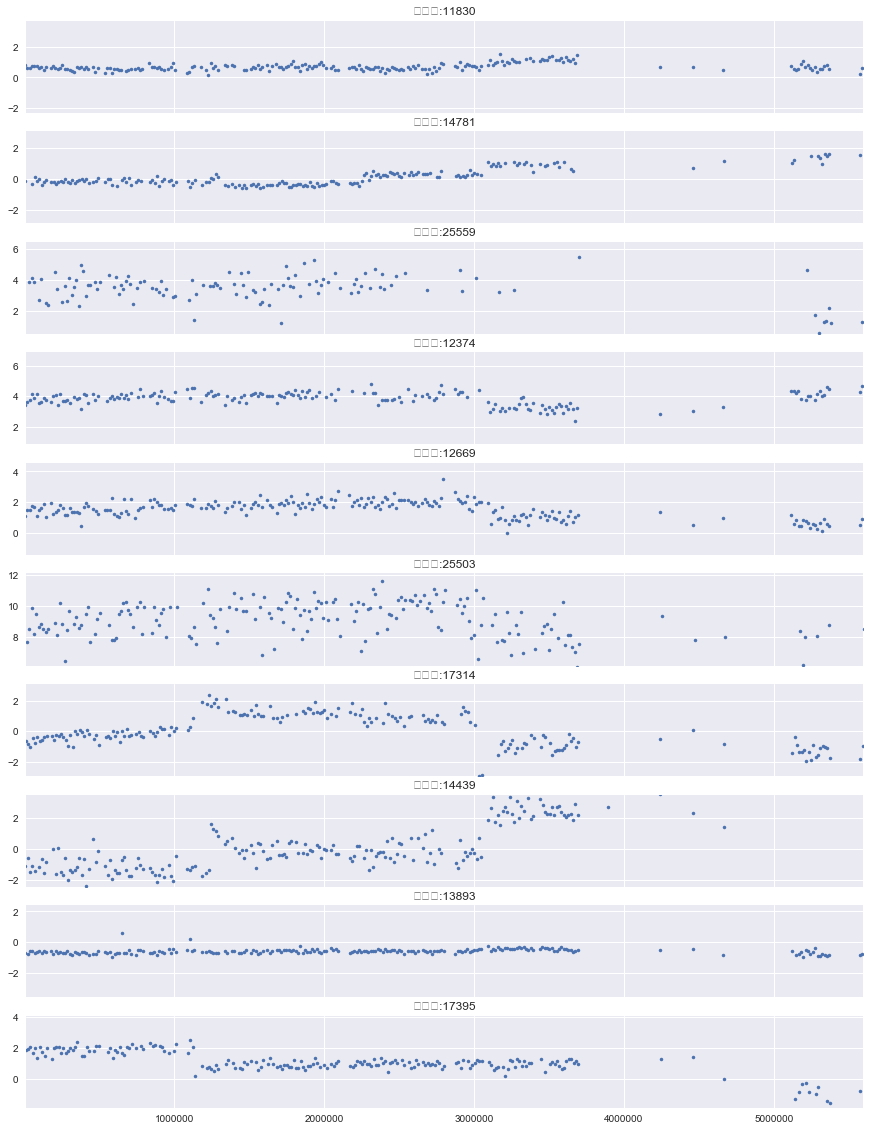

In [11]:
track = tracks["D"][["date", "キロ程","高低左"]]

# 全計測地点から10箇所をランダムサンプリング
rnd = np.random.choice(track["キロ程"].unique(), size=10, replace=False, p=None)

# サンプリングした計測地点の高低左変位を描画（Y軸のレンジを平均値±3で統一）
fig, axes = plt.subplots(10,1,figsize=(15, 20) ,sharex=True)#, sharey=True)
for i, k in enumerate(rnd):
    data = track[track["キロ程"]==k]["高低左"]
    data.plot(ax=axes[i], title="キロ程:" + str(k), marker=".", linewidth=0)
    m = track[track["キロ程"]==k]["高低左"].mean()
    axes[i].set_ylim(m-3,m+3)

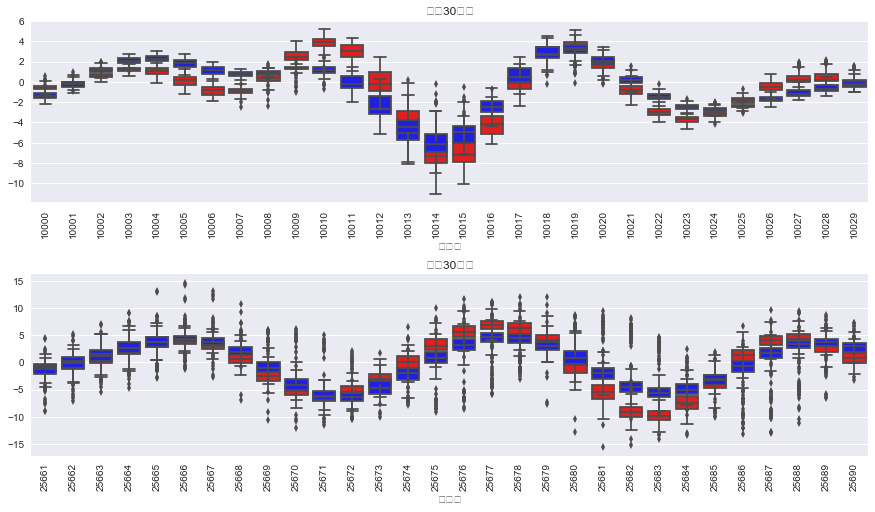

In [12]:
track = tracks["D"]

fig, axes = plt.subplots(2,1,figsize=(15,8))
start30_kiros = track["キロ程"].unique()[:30]
end30_kiros = track["キロ程"].unique()[-30:]

track1 = track[track["キロ程"].isin(start30_kiros)]
track2 = track[track["キロ程"].isin(end30_kiros)]

# 左は赤、右は青
sns.boxplot(x = "キロ程", y="高低左",data=track1, color="r", ax=axes[0])
sns.boxplot(x = "キロ程", y="高低右",data=track1, color="b", ax=axes[0])
axes[0].set_title("開始30地点")
axes[0].set_xticklabels(start30_kiros, rotation='vertical')
axes[0].set_ylabel("")

sns.boxplot(x = "キロ程", y="高低左",data=track2, color="r", ax=axes[1])
sns.boxplot(x = "キロ程", y="高低右",data=track2, color="b", ax=axes[1])
axes[1].set_title("終了30地点")
axes[1].set_xticklabels(end30_kiros, rotation='vertical')
axes[1].set_ylabel("")

plt.subplots_adjust(left=None, bottom=None, top=None, wspace=0, hspace=0.4)

In [14]:
# 軌道検測データと設備台帳データを統合
dfs={}
for no in ['A','B','C','D']:
    dfs[no] = pd.merge(tracks[no], equipments[no], on="キロ程")

/Users/noguchi/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


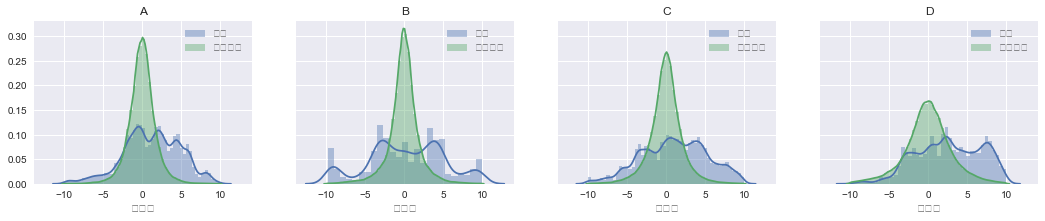

In [15]:
# 踏切と踏切以外での"高低左"の分布の違いを確認
fig, axes = plt.subplots(1, 4, figsize=(18, 3), sharex=True, sharey=True)
for i, (no, df) in enumerate(dfs.items()):
    for f in [1, 0]: # 1=踏切, 0=踏切以外
        tmp = df[df["踏切"]==f]["高低左"].dropna() # 欠損があるとエラーとなるため削除
        tmp = tmp[(tmp < 10) & (tmp > -10)] # 範囲を限定
        sns.distplot(tmp, kde=True, rug=False, ax=axes[i])
        axes[i].legend(["踏切","踏切以外"])
    axes[i].set_title(no)

In [16]:
p = []
for no, track in tracks.items():
    mean_by_kiros = track.groupby("キロ程").mean()["高低左"] #キロ程毎の平均値
    mean_by_kiros91 = np.array(list(mean_by_kiros.values) * 91) # 評価期間の91日分に拡張
    p.extend(mean_by_kiros91) # 配列に追加

In [20]:
mean_by_kiros.shape

(15691,)

In [23]:
mean_by_kiros

キロ程
10000   -0.538720
10001   -0.177630
10002    0.619434
10003    1.211784
10004    1.034575
10005    0.095352
10006   -0.894977
10007   -0.951268
10008    0.383224
10009    2.475681
10010    3.822723
10011    3.014038
10012   -0.149019
10013   -4.275587
10014   -7.123052
10015   -7.071542
10016   -4.174486
10017   -0.109202
10018    2.904413
10019    3.496385
10020    1.812884
10021   -0.838738
10022   -2.965140
10023   -3.721767
10024   -3.135674
10025   -1.811972
10026   -0.450329
10027    0.398465
10028    0.500140
10029   -0.020926
           ...   
25661   -1.197823
25662   -0.341680
25663    0.981360
25664    2.498952
25665    3.742160
25666    4.149194
25667    3.174959
25668    0.876967
25669   -2.122951
25670   -4.704918
25671   -5.870826
25672   -5.208618
25673   -3.063125
25674   -0.116853
25675    2.864730
25676    5.254527
25677    6.384650
25678    6.030335
25679    3.849558
25680   -0.082747
25681   -4.656250
25682   -8.095572
25683   -9.072600
25684   -7.232120
25685 

In [25]:
mean_by_kiros91.shape

(1427881,)

In [17]:
submit = pd.DataFrame(p)

In [18]:
submit

,0
0,-1.330575
1,-1.136923
2,-0.727336
3,-0.042664
4,0.844023
5,1.779080
6,2.387821
7,2.242706
8,1.160080
9,-0.909004


In [22]:
submit.shape

(10993892, 1)